
# No Show Appointments **Capstone Edition**
Amanda Bowman


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#load">Load and Explore the Data</a></li>
<li><a href="#clean">Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#eda">Preprocessing</a></li> 
<li><a href="#eda">Data Model</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#sources">Sources</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset is a simplified version of the Medical Appointment No Shows dataset on kaggle. It contains data for 110,527 unique appointments with 14 associated values for different characteristics. It was most recently updated six years ago. One item of note when viewing this dataset is that the value of the No Show column indicates whether the patient no-showed for the appointment. This means that "Yes" or, later, True mean that the patient did NOT attend the appointment.

#### Descriptive information about each column

| Column Name     | Description   | Original Datatype | Final Datatype |
|:-----           |:-----         |:-------           |:--------       |
|PatientId      |Identification of a patient   | float             | string            |
| AppointmentID  | Identification of each appointment         | int               | string            |
| Gender         | Male or Female .    | string            | int         |
| ScheduledDay   | The day someone called or registered the appointment, this should be before appointment.      | string            | datetime       |
| AppointmentDay | The day of the actual appointment, when they have to visit the doctor.                                                                                                                                                 | string            | datetime       |
| Age            | How old is the patient.                                                | int               | int            |
| Neighbourhood  | Where the appointment takes place.                                                 | string            | int           |
| Scholarship    | 0 or 1 .  True indicates enrollment in the social program Bolsa Familia. Between 2003 and 2021, Bolsa Familia supported families with children ages 0-17 living in poverty (monthly income between R$85.01 and R$170.00) and in extreme poverty  (monthly income equal to or less than R$85.00).  Note: To maintain eligibility, children must receive vaccinations on schedule and maintain attendance in school. For children between the ages of 6 and 15, they must meet a 85\%   attendance expectation. Children aged between 16 and 17  must meet a 75\% attendance expectation.  | int               | int           |
| Hipertension   |0 or 1     | int               | int           |
| Diabetes       | 0 or 1     | int               | int           |
| Alcoholism     | 0 or 1     | int               | int           |
| Handcap        | 0-4    | int               | int           |
| SMS_received   | 0 or 1 | int               | int           |
| No-show        | Yes or No. Yes means patient no-showed for the appointment.      | string            | int           |


For additional details about the data set, including the data dictionary:
[kaggle](https://www.kaggle.com/datasets/joniarroba/noshowappointments)
[Project Description](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub)

### Question(s) for Analysis

1) Which factors or characteristics have a positive relationship with no shows? 

2) Is there a relationship between the length of time between scheduling the appointments and appointment attendance? Do people who receive text message reminders attend more frequently and does this relate no shows to the length of time?


### Import the required packages

In [89]:
#!pip install --upgrade pandas==1.3.5
#!pip install --upgrade scikit-learn
#!pip install --upgrade seaborn
#!pip install --upgrade matplotlib

In [90]:
from platform import python_version

print(python_version())

3.8.16


In [91]:
# set up import statements for all of the packages that will be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

%matplotlib inline

In [92]:
# set some variables
fig_dims = (12,5)

<a id='load'></a>
## Load and Explore the Data

In [93]:
# Load data and print out a few lines to get a basic understanding of the dataset and ensure loading:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [94]:
# Understand basic features of dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [95]:
# View statistical information about the columns.
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


While several of these columns are integers, they appear to represent categorical data. What are the possible values?

In [96]:
columns = ['Gender','Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show']
for col in columns:
    col_values = str(col) + ': ' + str(pd.unique(df[col])) 
    print(col_values) 
    print()  # cycle through each column and print the concatenated string

Gender: ['F' 'M']

Neighbourhood: ['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÚBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERREIRA' 'SÃO PEDRO' 'SANTA MARTHA' 'SÃO CRISTÓVÃO'
 'MARUÍPE' 'GRANDE VITÓRIA' 'SÃO BENEDITO' 'ILHA DAS CAIEIRAS'
 'SANTO ANDRÉ' 'SOLON BORGES' 'BONFIM' 'JARDIM CAMBURI' 'MARIA ORTIZ'
 'JABOUR' 'ANTÔNIO HONÓRIO' 'RESISTÊNCIA' 'ILHA DE SANTA MARIA'
 'JUCUTUQUARA' 'MONTE BELO' 'MÁRIO CYPRESTE' 'SANTO ANTÔNIO' 'BELA VISTA'
 'PRAIA DO SUÁ' 'SANTA HELENA' 'ITARARÉ' 'INHANGUETÁ' 'UNIVERSITÁRIO'
 'SÃO JOSÉ' 'REDENÇÃO' 'SANTA CLARA' 'CENTRO' 'PARQUE MOSCOSO'
 'DO MOSCOSO' 'SANTOS DUMONT' 'CARATOÍRA' 'ARIOVALDO FAVALESSA'
 'ILHA DO FRADE' 'GURIGICA' 'JOANA D´ARC' 'CONSOLAÇÃO' 'PRAIA DO CANTO'
 'BOA VISTA' 'MORADA DE CAMBURI' 'SANTA LUÍZA' 'SANTA LÚCIA'
 'BARRO VERMELHO' 'ESTRELINHA' 'FORTE SÃO JOÃO' 'FONTE GRANDE'
 'ENSEADA DO SUÁ' 'SANTOS REIS' 'PIEDADE' 'JESUS DE NAZARETH'
 'SANTA TEREZA' 'CRUZAMENTO' 'IL

In [97]:
# Number of duplicate rows?
sum(df.duplicated())

0

In [98]:
# Missing data?
df.isna().any(axis=1).sum() 

0

In [99]:
# Check the number of unique patients versus the number of unique appointments to determine how these columns relate.
print('Number of unique patients: ', df['PatientId'].nunique())
print('Number of unique appointments: ', df['AppointmentID'].nunique())

Number of unique patients:  62299
Number of unique appointments:  110527


This indicates that each appointment is only linked to one patient, but one patient can have many appointments.

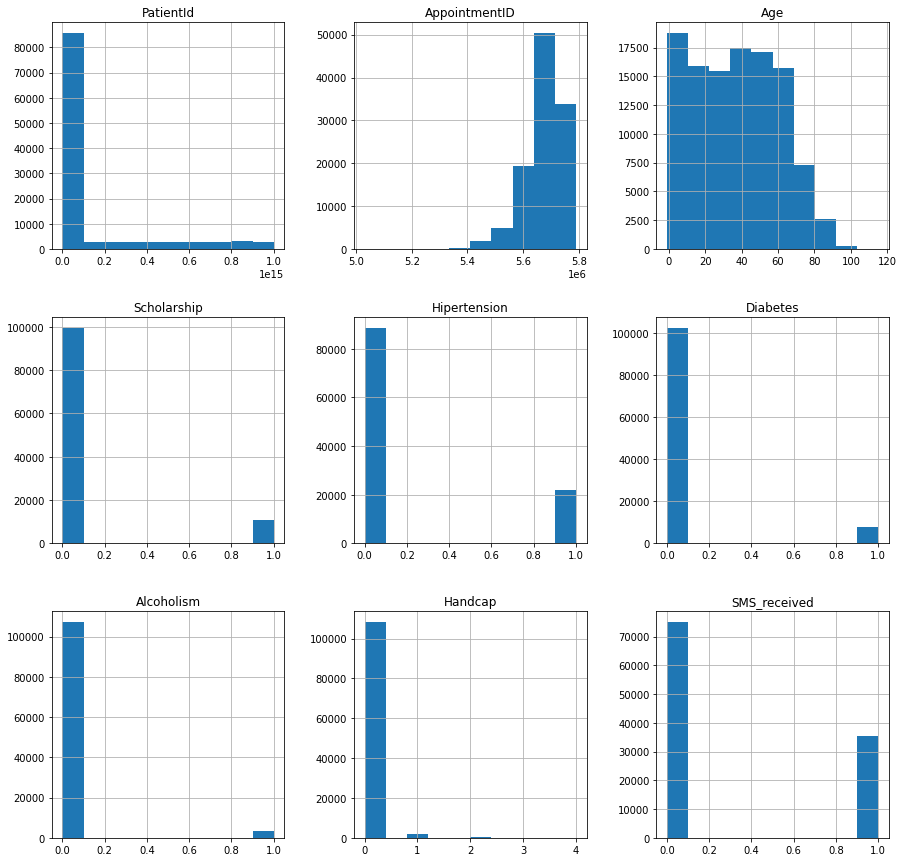

In [100]:
# Histograms of each column to better understand the data and distributions for each column. AppointmentID and PatientId will have no meaning.
df.hist(figsize=(15,15));

In [101]:
def plot_dist(df, col_name, width_bin):
    sns.displot(data=df, x=col_name, binwidth=width_bin, height=5, aspect=11.7/5);

<a id='clean'></a>
## Cleaning and Wrangling

As identified above, there are no duplicate rows and no missing values. My data will require some wrangling before it is ready for use in a model. I will address some general issues and perform initial feature engineering on the date columns.

#### Update Column Names and Drop ID columns

 
 * Column Headers:
     - Capitalized - need to make lower case
     - Need to separate PatientId, AppointmentID, ScheduledDay, AppointmentDay with _
     - Change No-show to no_show     
     - Update Hipertension and Handcap column names
     

     




     - sheduled_day and appointment_day to datetime
     - scholarship, hipertension, diabetes, alcoholism, sms_received, no_show to bool
     


In [102]:
# Make a copy of the data
df_prep = df.copy()

In [103]:
# Make all column names lower case and replace the dash with an underscore.
df_prep.rename(columns= lambda x:x.lower().replace("-", "_"), inplace=True)
# Rename the rest of columns by adding an underscore and update column names. 
df_prep.rename(columns={'scheduledday':'scheduled_day', 'appointmentday':'appointment_day', 'hipertension':'hypertension', 'handcap':'disability_count', 'patientid': 'pt_id', 'appointmentid': 'appt_id'}, inplace=True)
# Check new column names.
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   pt_id             110527 non-null  float64
 1   appt_id           110527 non-null  int64  
 2   gender            110527 non-null  object 
 3   scheduled_day     110527 non-null  object 
 4   appointment_day   110527 non-null  object 
 5   age               110527 non-null  int64  
 6   neighbourhood     110527 non-null  object 
 7   scholarship       110527 non-null  int64  
 8   hypertension      110527 non-null  int64  
 9   diabetes          110527 non-null  int64  
 10  alcoholism        110527 non-null  int64  
 11  disability_count  110527 non-null  int64  
 12  sms_received      110527 non-null  int64  
 13  no_show           110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#### Address Age
 
 Age is an integer variable starting at 0. There were patients aged under 0 and over 100 years old. 115 years old seems like a potential error.

The number of patients between the ages of 100 and 120 is very small. What can I learn about those patients to determine whether they need to be dropped from the dataset as errors?

What are the ages of the patient for the 10 oldest-aged appointments?

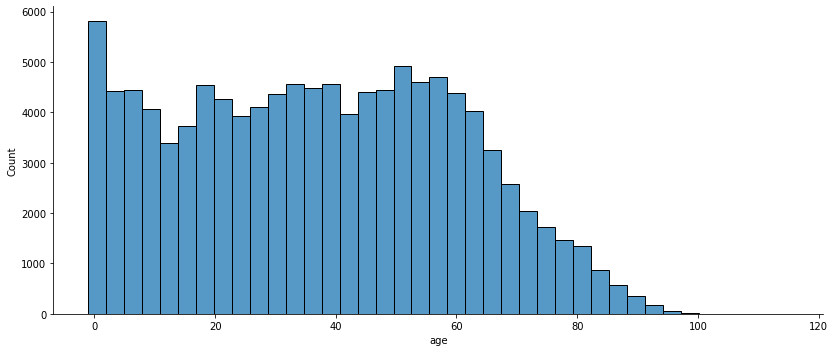

In [104]:
# What does the distribution of ages look like?
plot_dist(df_prep,'age', 3)

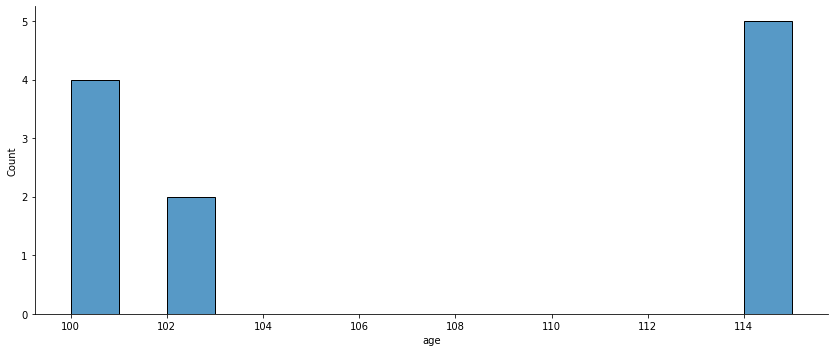

In [105]:
#The number of patients between the ages of 100 and 120 is very small. 
#What can I learn about those patients to determine whether they need to be dropped from the dataset as errors?
plot_dist(df_prep[df_prep['age'] >= 100], 'age', 1)

In [106]:
df_prep[df_prep['age'] >= 102]

,pt_id,appt_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,disability_count,sms_received,no_show
58014,9.762948e+14,5651757,F,2016-05-03T09:14:53Z,2016-05-03T00:00:00Z,102,CONQUISTA,0,0,0,0,0,0,No
63912,3.196321e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196321e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.196321e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196321e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
90372,2.342836e+11,5751563,F,2016-05-31T10:19:49Z,2016-06-02T00:00:00Z,102,MARIA ORTIZ,0,0,0,0,0,0,No
97666,7.482346e+14,5717451,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SÃO JOSÉ,0,1,0,0,0,1,No


Based on patientid, the max age of 115 is for two distinct patients, one with multiple appointments. The next oldest is 102. While it is possible that this age is correct, reviewing [World Age Statistics] (https://en.wikipedia.org/wiki/Oldest_people#:~:text=The%20oldest%20living%20person%20in,Venezuela%2C%20born%2027%20May%201909.) indicates it is unlikely to have even one person of this age in this data, let alone two. It is impossible to determine whether these ages were entered in error, so it will be necessary to remove these rows. Since the next oldest patient is 102 and there are 6 patients between the ages of 100 and 102, I will use this as a cutoff. 

In [107]:
df_prep.drop(df_prep[df_prep['age'] > 102].index, inplace = True)
df_prep.drop(df_prep[df_prep['age'] < 0].index, inplace = True)

In [108]:
df_prep['age'].describe()

count    110521.000000
mean         37.085694
std          23.104606
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         102.000000
Name: age, dtype: float64

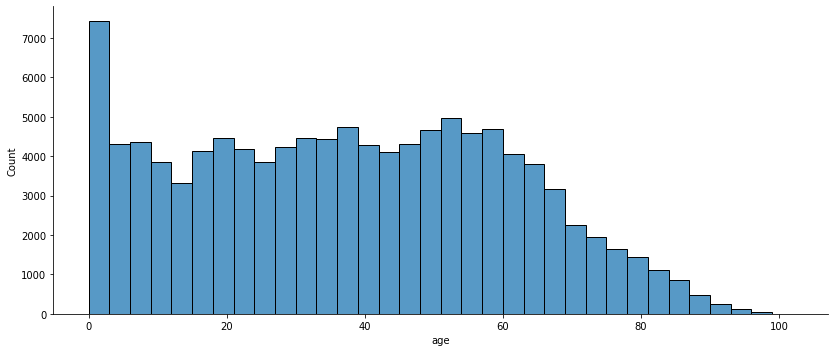

In [109]:
plot_dist(df_prep,'age', 3)

### No Show Rate Feature Engineering
 
While every appointment id is unique, there are duplicate rows for some patients. This means that some patients may have multiple no-shows. Literature shows that past No Shows can be a good indicator of future now shows. As such, it would be helpful to calculate the no show rate for each patient.

 * Need to be converted to DateTime
 * Create a function to 

In [110]:
# convert to DateTime
df_prep['scheduled_day'] = pd.to_datetime(df_prep['scheduled_day'])
df_prep['appointment_day'] = pd.to_datetime(df_prep['appointment_day'])
df_prep.head()

,pt_id,appt_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,disability_count,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [111]:
sum(df_prep['pt_id'].duplicated(keep=False))

72603

In [112]:
def count_noshows(dup_df):
    """Adds columns with cumulative count of appointments and no-shows for each patient.
    
    Parameters:
    dup_df: DataFrame with patients with multiple appointments
    
    Returns:
    dup_df: same DataFrame with new columns for appointment and no-show count
    """
    # sort df first by patient id and then by appointment date
    dup_df = dup_df.sort_values(['pt_id', 'appointment_day'])
    
    # group rows by patient id and cumulatively count the number of appointments
    dup_df['past_appts'] = dup_df.groupby('pt_id').cumcount()

    # group rows by patient id and counts the number of no shows for each row
    dup_df['past_ns'] = (dup_df
                          .groupby('pt_id')['no_show']
                          .apply(lambda x: (x == 'Yes')
                          .cumsum() - (x == 'Yes').astype(int))).fillna(0)
    return dup_df

In [113]:
# apply function to the duplicate pts df and return a new df
df_prep = count_noshows(df_prep)

In [114]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 100517 to 76224
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype              
---  ------            --------------   -----              
 0   pt_id             110521 non-null  float64            
 1   appt_id           110521 non-null  int64              
 2   gender            110521 non-null  object             
 3   scheduled_day     110521 non-null  datetime64[ns, UTC]
 4   appointment_day   110521 non-null  datetime64[ns, UTC]
 5   age               110521 non-null  int64              
 6   neighbourhood     110521 non-null  object             
 7   scholarship       110521 non-null  int64              
 8   hypertension      110521 non-null  int64              
 9   diabetes          110521 non-null  int64              
 10  alcoholism        110521 non-null  int64              
 11  disability_count  110521 non-null  int64              
 12  sms_received      110521 non-null  int64

In [115]:
# view updated dataframe and relevant info
df_prep.sort_values('pt_id').head(20)

,pt_id,appt_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,disability_count,sms_received,no_show,past_appts,past_ns
100517,3.921784e+04,5751990,F,2016-05-31 10:56:41+00:00,2016-06-03 00:00:00+00:00,44,PRAIA DO SUÁ,0,0,0,0,0,0,No,0,0
105430,4.374176e+04,5760144,M,2016-06-01 14:22:58+00:00,2016-06-01 00:00:00+00:00,39,MARIA ORTIZ,0,0,1,0,0,0,No,0,0
3950,9.377953e+04,5712759,F,2016-05-18 09:12:29+00:00,2016-05-18 00:00:00+00:00,33,CENTRO,0,0,0,0,0,0,No,0,0
73303,1.417242e+05,5637648,M,2016-04-29 07:13:36+00:00,2016-05-02 00:00:00+00:00,12,FORTE SÃO JOÃO,0,0,0,0,0,0,No,0,0
73228,5.376153e+05,5637728,F,2016-04-29 07:19:57+00:00,2016-05-06 00:00:00+00:00,14,FORTE SÃO JOÃO,0,0,0,0,0,1,No,0,0
54611,5.628261e+06,5680449,M,2016-05-10 11:58:18+00:00,2016-05-13 00:00:00+00:00,13,PARQUE MOSCOSO,0,0,0,0,0,0,Yes,0,0
40692,1.183186e+07,5718578,M,2016-05-19 09:42:07+00:00,2016-05-19 00:00:00+00:00,16,SANTO ANTÔNIO,0,0,0,0,0,0,No,0,0
58616,2.263866e+07,5580835,F,2016-04-14 07:23:30+00:00,2016-05-03 00:00:00+00:00,22,INHANGUETÁ,0,0,0,0,0,1,No,0,0
88585,2.263866e+07,5715081,F,2016-05-18 13:37:12+00:00,2016-06-08 00:00:00+00:00,23,INHANGUETÁ,0,0,0,0,0,1,No,1,0
83628,5.216894e+07,5704816,F,2016-05-16 16:42:19+00:00,2016-05-16 00:00:00+00:00,28,JARDIM DA PENHA,0,0,0,0,0,0,No,0,0


In [116]:
df_prep['noshow_rate'] = (df_prep['past_ns'] / df_prep['past_appts']).fillna(0)
df_prep.head(10)

,pt_id,appt_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,disability_count,sms_received,no_show,past_appts,past_ns,noshow_rate
100517,3.921784e+04,5751990,F,2016-05-31 10:56:41+00:00,2016-06-03 00:00:00+00:00,44,PRAIA DO SUÁ,0,0,0,0,0,0,No,0,0,0.0
105430,4.374176e+04,5760144,M,2016-06-01 14:22:58+00:00,2016-06-01 00:00:00+00:00,39,MARIA ORTIZ,0,0,1,0,0,0,No,0,0,0.0
3950,9.377953e+04,5712759,F,2016-05-18 09:12:29+00:00,2016-05-18 00:00:00+00:00,33,CENTRO,0,0,0,0,0,0,No,0,0,0.0
73303,1.417242e+05,5637648,M,2016-04-29 07:13:36+00:00,2016-05-02 00:00:00+00:00,12,FORTE SÃO JOÃO,0,0,0,0,0,0,No,0,0,0.0
73228,5.376153e+05,5637728,F,2016-04-29 07:19:57+00:00,2016-05-06 00:00:00+00:00,14,FORTE SÃO JOÃO,0,0,0,0,0,1,No,0,0,0.0
54611,5.628261e+06,5680449,M,2016-05-10 11:58:18+00:00,2016-05-13 00:00:00+00:00,13,PARQUE MOSCOSO,0,0,0,0,0,0,Yes,0,0,0.0
40692,1.183186e+07,5718578,M,2016-05-19 09:42:07+00:00,2016-05-19 00:00:00+00:00,16,SANTO ANTÔNIO,0,0,0,0,0,0,No,0,0,0.0
58616,2.263866e+07,5580835,F,2016-04-14 07:23:30+00:00,2016-05-03 00:00:00+00:00,22,INHANGUETÁ,0,0,0,0,0,1,No,0,0,0.0
88585,2.263866e+07,5715081,F,2016-05-18 13:37:12+00:00,2016-06-08 00:00:00+00:00,23,INHANGUETÁ,0,0,0,0,0,1,No,1,0,0.0
83628,5.216894e+07,5704816,F,2016-05-16 16:42:19+00:00,2016-05-16 00:00:00+00:00,28,JARDIM DA PENHA,0,0,0,0,0,0,No,0,0,0.0


In [117]:
df_prep[df_prep['pt_id'].duplicated(keep=False)].sort_values('pt_id').head(10)

,pt_id,appt_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,disability_count,sms_received,no_show,past_appts,past_ns,noshow_rate
58616,22638656.0,5580835,F,2016-04-14 07:23:30+00:00,2016-05-03 00:00:00+00:00,22,INHANGUETÁ,0,0,0,0,0,1,No,0,0,0.0
88585,22638656.0,5715081,F,2016-05-18 13:37:12+00:00,2016-06-08 00:00:00+00:00,23,INHANGUETÁ,0,0,0,0,0,1,No,1,0,0.0
83628,52168938.0,5704816,F,2016-05-16 16:42:19+00:00,2016-05-16 00:00:00+00:00,28,JARDIM DA PENHA,0,0,0,0,0,0,No,0,0,0.0
49826,52168938.0,5607220,F,2016-04-20 11:22:15+00:00,2016-05-17 00:00:00+00:00,28,JARDIM DA PENHA,0,0,0,0,0,0,No,1,0,0.0
11009,64851211.0,5683383,F,2016-05-11 07:28:23+00:00,2016-05-13 00:00:00+00:00,29,MARUÍPE,0,0,0,0,0,0,Yes,0,0,0.0
6674,64851211.0,5697532,F,2016-05-13 16:22:26+00:00,2016-05-17 00:00:00+00:00,29,MARUÍPE,0,0,0,0,0,0,No,1,1,1.0
58066,79228495.0,5742958,F,2016-05-30 08:31:53+00:00,2016-05-30 00:00:00+00:00,21,NOVA PALESTINA,0,0,0,0,0,0,No,0,0,0.0
89371,79228495.0,5743266,F,2016-05-30 08:51:07+00:00,2016-06-08 00:00:00+00:00,21,NOVA PALESTINA,0,0,0,0,0,1,No,1,0,0.0
74916,87996454.0,5651939,M,2016-05-03 09:27:49+00:00,2016-05-13 00:00:00+00:00,3,ILHA DAS CAIEIRAS,0,0,0,0,0,0,Yes,0,0,0.0
105577,87996454.0,5786272,M,2016-06-08 08:12:09+00:00,2016-06-08 00:00:00+00:00,3,ILHA DAS CAIEIRAS,0,0,0,0,0,0,No,1,1,1.0


In [118]:
# Drop appointment and patient id columns
df_prep.drop(columns=['past_appts', 'past_ns'], inplace=True)
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 100517 to 76224
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype              
---  ------            --------------   -----              
 0   pt_id             110521 non-null  float64            
 1   appt_id           110521 non-null  int64              
 2   gender            110521 non-null  object             
 3   scheduled_day     110521 non-null  datetime64[ns, UTC]
 4   appointment_day   110521 non-null  datetime64[ns, UTC]
 5   age               110521 non-null  int64              
 6   neighbourhood     110521 non-null  object             
 7   scholarship       110521 non-null  int64              
 8   hypertension      110521 non-null  int64              
 9   diabetes          110521 non-null  int64              
 10  alcoholism        110521 non-null  int64              
 11  disability_count  110521 non-null  int64              
 12  sms_received      110521 non-null  int64

### Date Feature Engineering
 
Discrete dates will not be helpful for predicting future no-shows. The day of the week that the appointment was scheduled or that the patient called to schedule may be relevant. Columns with this data will be created. The time lapse between when the appointment is made and the appointment date likely does have a relationship with no shows. A time lapse column will be created to leverage the date information.

 * Need to be converted to DateTime
 * Extract day of the week for `scheduled_day` and `appointment_day`
 * Create new int col for number of days between scheduled and appt
 * Drop date columns

In [119]:
# What is the range of dates for the set?
df_prep['appointment_day'].agg(['min', 'max'])

min   2016-04-29 00:00:00+00:00
max   2016-06-08 00:00:00+00:00
Name: appointment_day, dtype: datetime64[ns, UTC]

In [120]:
# Could the day of the week for scheduling or the appointment day be relevant?
df_prep['appointment_weekday'] = df_prep['appointment_day'].dt.dayofweek
df_prep['scheduled_weekday'] = df_prep['scheduled_day'].dt.dayofweek

In [121]:
df_prep.head()

,pt_id,appt_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,disability_count,sms_received,no_show,noshow_rate,appointment_weekday,scheduled_weekday
100517,39217.84439,5751990,F,2016-05-31 10:56:41+00:00,2016-06-03 00:00:00+00:00,44,PRAIA DO SUÁ,0,0,0,0,0,0,No,0.0,4,1
105430,43741.75652,5760144,M,2016-06-01 14:22:58+00:00,2016-06-01 00:00:00+00:00,39,MARIA ORTIZ,0,0,1,0,0,0,No,0.0,2,2
3950,93779.52927,5712759,F,2016-05-18 09:12:29+00:00,2016-05-18 00:00:00+00:00,33,CENTRO,0,0,0,0,0,0,No,0.0,2,2
73303,141724.16655,5637648,M,2016-04-29 07:13:36+00:00,2016-05-02 00:00:00+00:00,12,FORTE SÃO JOÃO,0,0,0,0,0,0,No,0.0,0,4
73228,537615.28476,5637728,F,2016-04-29 07:19:57+00:00,2016-05-06 00:00:00+00:00,14,FORTE SÃO JOÃO,0,0,0,0,0,1,No,0.0,4,4


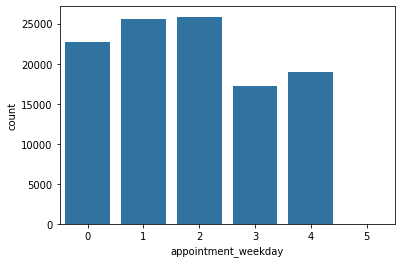

In [122]:
sns.countplot(data=df_prep, x='appointment_weekday');

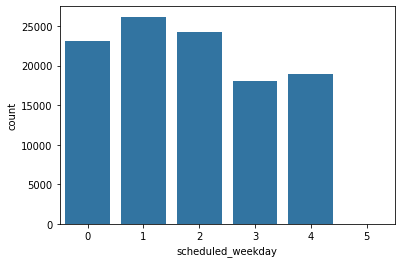

In [123]:
sns.countplot(data=df_prep, x='scheduled_weekday');

In [124]:
# Create new column for the number of days between scheduling and the actual appointment. 
df_prep['days_between'] = (df_prep['appointment_day'] - df_prep['scheduled_day']).dt.days.astype(int)

#View the statistical information about the new column.
df_prep['days_between'].describe()

count    110521.000000
mean          9.183721
std          15.255082
min          -7.000000
25%          -1.000000
50%           3.000000
75%          14.000000
max         178.000000
Name: days_between, dtype: float64

Appointment_day does not have time included but scheduled_day does. This is causing a -1 in days_between. This value should be 0 to indicate that the appointment was scheduled on the same day. Any rows with a negative number after -1 has been replaced with 0 are erroneous and need to be removed.

In [125]:
# Replace rows with -1 for same day with 0
df_prep['days_between'].replace(-1, 0, inplace=True)

In [126]:
# Drop rows with appointment dates prior to scheduling dates
df_prep.drop(df_prep[df_prep['days_between'] < 0].index, inplace = True)

In [127]:
# Verify
df_prep['days_between'].describe()

count    110516.000000
mean          9.533190
std          15.028018
min           0.000000
25%           0.000000
50%           3.000000
75%          14.000000
max         178.000000
Name: days_between, dtype: float64

In [128]:
# Drop date columns
df_prep.drop(columns=['appointment_day', 'scheduled_day'], inplace=True)
df_prep.head()

,pt_id,appt_id,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,disability_count,sms_received,no_show,noshow_rate,appointment_weekday,scheduled_weekday,days_between
100517,39217.84439,5751990,F,44,PRAIA DO SUÁ,0,0,0,0,0,0,No,0.0,4,1,2
105430,43741.75652,5760144,M,39,MARIA ORTIZ,0,0,1,0,0,0,No,0.0,2,2,0
3950,93779.52927,5712759,F,33,CENTRO,0,0,0,0,0,0,No,0.0,2,2,0
73303,141724.16655,5637648,M,12,FORTE SÃO JOÃO,0,0,0,0,0,0,No,0.0,0,4,2
73228,537615.28476,5637728,F,14,FORTE SÃO JOÃO,0,0,0,0,0,1,No,0.0,4,4,6


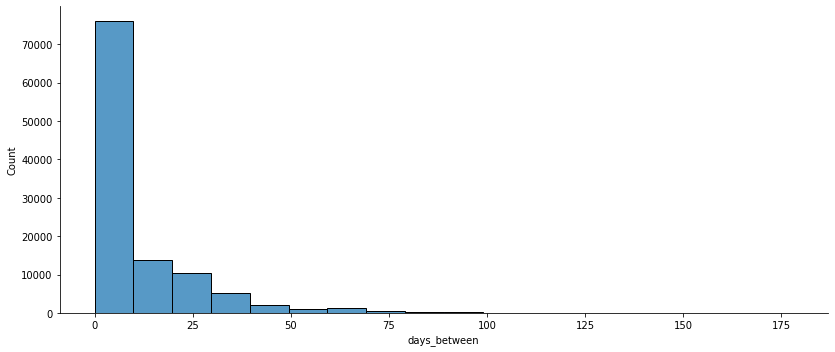

In [129]:
# distribution of days between
# Note: This data is highly skewed and will require transformation
plot_dist(df_prep, 'days_between', 10)

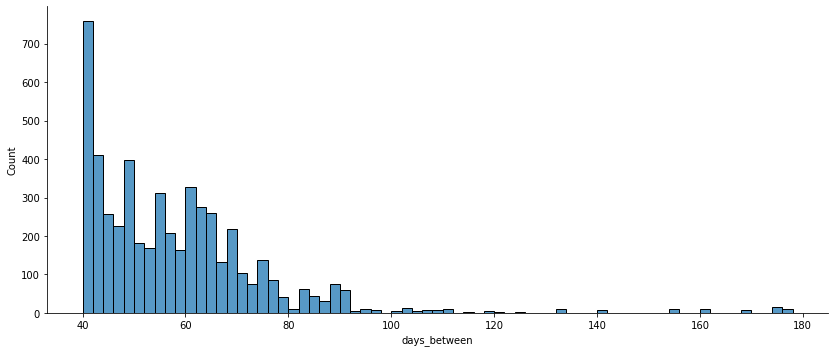

In [130]:
# distribution of days between greater than approximately 2 std above the mean
plot_dist(df_prep[df_prep['days_between'] >= 40], 'days_between', 2)

#### ID Columns
Since each row represents one appointment, I can drop the appointment and patient id columns.

In [131]:
# Drop appointment and patient id columns
df_prep.drop(columns=['appt_id', 'pt_id'], inplace=True)

In [132]:
print(df_prep.info())
df_prep.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110516 entries, 100517 to 76224
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               110516 non-null  object 
 1   age                  110516 non-null  int64  
 2   neighbourhood        110516 non-null  object 
 3   scholarship          110516 non-null  int64  
 4   hypertension         110516 non-null  int64  
 5   diabetes             110516 non-null  int64  
 6   alcoholism           110516 non-null  int64  
 7   disability_count     110516 non-null  int64  
 8   sms_received         110516 non-null  int64  
 9   no_show              110516 non-null  object 
 10  noshow_rate          110516 non-null  float64
 11  appointment_weekday  110516 non-null  int64  
 12  scheduled_weekday    110516 non-null  int64  
 13  days_between         110516 non-null  int32  
dtypes: float64(1), int32(1), int64(9), object(3)
memory usage: 16.3+

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,disability_count,sms_received,no_show,noshow_rate,appointment_weekday,scheduled_weekday,days_between
100517,F,44,PRAIA DO SUÁ,0,0,0,0,0,0,No,0.0,4,1,2
105430,M,39,MARIA ORTIZ,0,0,1,0,0,0,No,0.0,2,2,0
3950,F,33,CENTRO,0,0,0,0,0,0,No,0.0,2,2,0
73303,M,12,FORTE SÃO JOÃO,0,0,0,0,0,0,No,0.0,0,4,2
73228,F,14,FORTE SÃO JOÃO,0,0,0,0,0,1,No,0.0,4,4,6


In [133]:
# Copy the DataaFrame for further processing
df_engineer = df_prep.copy()

## Preprocessing

### Continuous Variables
`age` and `days_between` are both continuous variables with a high degree of skew. The skew will cause problems with the model, so this must be addressed.

**Age**

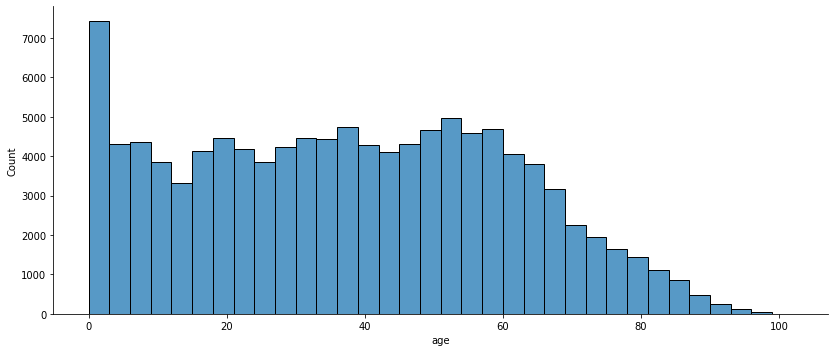

In [134]:
# view distribution of age
plot_dist(df_engineer,'age', 3)

In [135]:
# identify the age bins and labels
age_bins = [0, 1, 5, 17, 28, 44, 54, 65, 75, 102]
age_labels = ['infant', 'preschool', 'child', 'young_adult', 'adult', 'middle_aged', 'mature_adult', 'senior', '80_and_over']
# cut the data into bins
df_engineer['age_range'] = pd.cut(df_engineer['age'], bins=age_bins, labels=age_labels)
df_engineer.head()

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,disability_count,sms_received,no_show,noshow_rate,appointment_weekday,scheduled_weekday,days_between,age_range
100517,F,44,PRAIA DO SUÁ,0,0,0,0,0,0,No,0.0,4,1,2,adult
105430,M,39,MARIA ORTIZ,0,0,1,0,0,0,No,0.0,2,2,0,adult
3950,F,33,CENTRO,0,0,0,0,0,0,No,0.0,2,2,0,adult
73303,M,12,FORTE SÃO JOÃO,0,0,0,0,0,0,No,0.0,0,4,2,child
73228,F,14,FORTE SÃO JOÃO,0,0,0,0,0,1,No,0.0,4,4,6,child


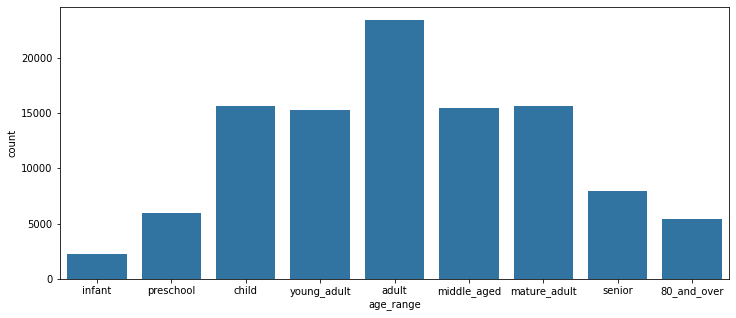

In [136]:
plt.figure(figsize=(12,5))
sns.countplot(data=df_engineer, x='age_range');

**Days Between**

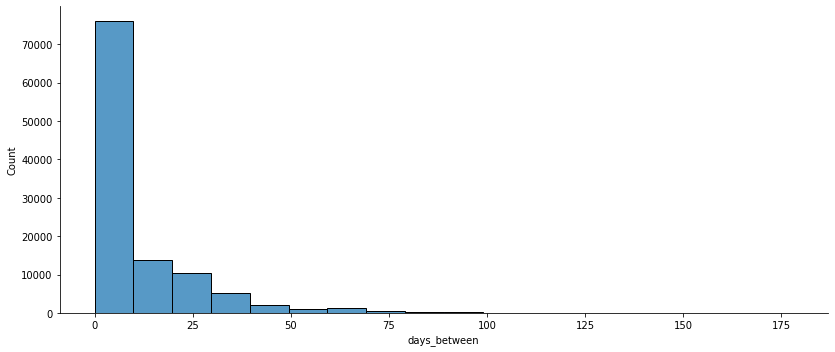

In [137]:
plot_dist(df_engineer, 'days_between', 10)

In [138]:
days_bins = [0, 1, 8, 31, 180]
days_labels = ['same_day', 'first_week', 'one_month', 'greater_than_one_month']
df_engineer['days_range'] = pd.cut(df_engineer['days_between'], bins=days_bins, labels=days_labels, right=False)

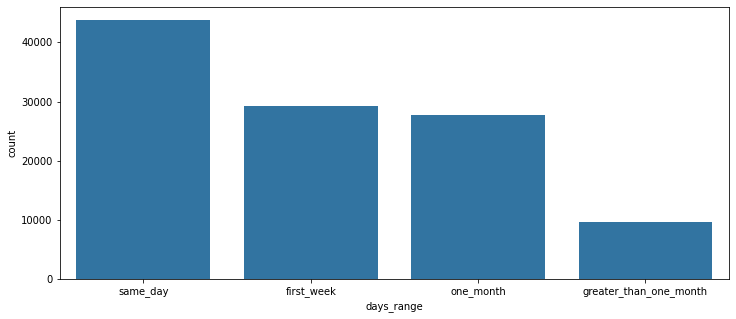

In [139]:
plt.figure(figsize=(12,5))
sns.countplot(data=df_engineer, x='days_range');

#### Disability Count
`disability_count` is an ordinal variable. As it is an int, no further engineering is required.


#### Categorical Variables

The rest of the variables are categorical variables. `scholarship`, `hypertension`, `diabetes`, `alcoholism`, and `sms_received` are already integer binary variables, so they require no additional engineering. `no_show` will need to be converted to a binary column. `gender`, `neighbourhood`, `age_range`, and `days_range` will need One Hot Encoding later for statistical testing.
    

In [140]:
df_engineer.head()

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,disability_count,sms_received,no_show,noshow_rate,appointment_weekday,scheduled_weekday,days_between,age_range,days_range
100517,F,44,PRAIA DO SUÁ,0,0,0,0,0,0,No,0.0,4,1,2,adult,first_week
105430,M,39,MARIA ORTIZ,0,0,1,0,0,0,No,0.0,2,2,0,adult,same_day
3950,F,33,CENTRO,0,0,0,0,0,0,No,0.0,2,2,0,adult,same_day
73303,M,12,FORTE SÃO JOÃO,0,0,0,0,0,0,No,0.0,0,4,2,child,first_week
73228,F,14,FORTE SÃO JOÃO,0,0,0,0,0,1,No,0.0,4,4,6,child,first_week


**Map `no_show` to binary values**

In [141]:
df_engineer['no_show'].unique()

array(['No', 'Yes'], dtype=object)

In [142]:
# map no_show to binary values
df_engineer['no_show'] = df_engineer['no_show'].replace({'No': 0, 'Yes': 1})

In [143]:
df_engineer['no_show'].unique()

array([0, 1], dtype=int64)

Review correlation with existing variables

In [144]:
df_engineer.corr()[['no_show']].sort_values(by='no_show', ascending=False)

,no_show
no_show,1.000000
days_between,0.180144
sms_received,0.126552
noshow_rate,0.111385
scholarship,0.029182
scheduled_weekday,0.006024
appointment_weekday,0.001184
alcoholism,-0.000173
disability_count,-0.006594
diabetes,-0.015146


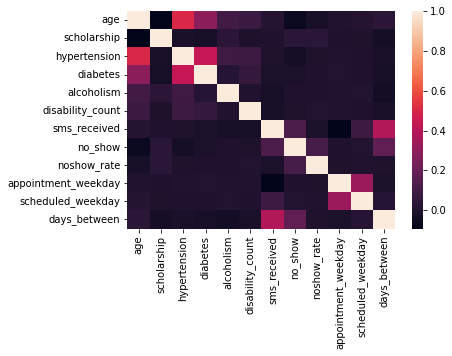

In [145]:
sns.heatmap(df_engineer.corr());

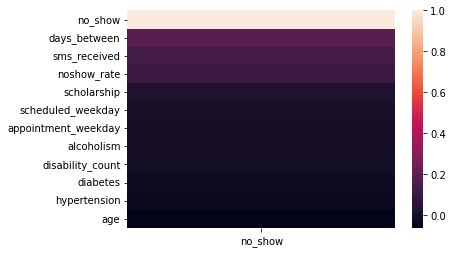

In [146]:
sns.heatmap(df_engineer.corr()[['no_show']].sort_values(by='no_show', ascending=False));

In [147]:
df_eda = df_engineer.copy()

In [148]:
df_engineer = df_engineer.drop(['age', 'days_between'], axis=1)
df_engineer.head()

,gender,neighbourhood,scholarship,hypertension,diabetes,alcoholism,disability_count,sms_received,no_show,noshow_rate,appointment_weekday,scheduled_weekday,age_range,days_range
100517,F,PRAIA DO SUÁ,0,0,0,0,0,0,0,0.0,4,1,adult,first_week
105430,M,MARIA ORTIZ,0,0,1,0,0,0,0,0.0,2,2,adult,same_day
3950,F,CENTRO,0,0,0,0,0,0,0,0.0,2,2,adult,same_day
73303,M,FORTE SÃO JOÃO,0,0,0,0,0,0,0,0.0,0,4,child,first_week
73228,F,FORTE SÃO JOÃO,0,0,0,0,0,1,0,0.0,4,4,child,first_week


In [149]:
df_engineer = pd.get_dummies(df_engineer, ['gender', 'neighbourhood', 'age_range', 'days_range'])

In [150]:
df_engineer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110516 entries, 100517 to 76224
Columns: 106 entries, scholarship to days_range_greater_than_one_month
dtypes: float64(1), int64(9), uint8(96)
memory usage: 23.4 MB


In [151]:
df_engineer.head()

,scholarship,hypertension,diabetes,alcoholism,disability_count,sms_received,no_show,noshow_rate,appointment_weekday,scheduled_weekday,...,age_range_young_adult,age_range_adult,age_range_middle_aged,age_range_mature_adult,age_range_senior,age_range_80_and_over,days_range_same_day,days_range_first_week,days_range_one_month,days_range_greater_than_one_month
100517,0,0,0,0,0,0,0,0.0,4,1,...,0,1,0,0,0,0,0,1,0,0
105430,0,0,1,0,0,0,0,0.0,2,2,...,0,1,0,0,0,0,1,0,0,0
3950,0,0,0,0,0,0,0,0.0,2,2,...,0,1,0,0,0,0,1,0,0,0
73303,0,0,0,0,0,0,0,0.0,0,4,...,0,0,0,0,0,0,0,1,0,0
73228,0,0,0,0,0,1,0,0.0,4,4,...,0,0,0,0,0,0,0,1,0,0


In [152]:
df_engineer.describe()

,scholarship,hypertension,diabetes,alcoholism,disability_count,sms_received,no_show,noshow_rate,appointment_weekday,scheduled_weekday,...,age_range_young_adult,age_range_adult,age_range_middle_aged,age_range_mature_adult,age_range_senior,age_range_80_and_over,days_range_same_day,days_range_first_week,days_range_one_month,days_range_greater_than_one_month
count,110516.000000,110516.000000,110516.000000,110516.000000,110516.000000,110516.000000,110516.000000,110516.000000,110516.000000,110516.000000,...,110516.000000,110516.000000,110516.000000,110516.000000,110516.000000,110516.000000,110516.000000,110516.000000,110516.000000,110516.000000
mean,0.098275,0.197257,0.071872,0.030403,0.022196,0.321049,0.201880,0.086549,1.858274,1.851985,...,0.138677,0.211951,0.139934,0.141409,0.071564,0.048735,0.396087,0.265138,0.250959,0.087815
std,0.297688,0.397929,0.258277,0.171694,0.161390,0.466882,0.401405,0.246985,1.371662,1.378517,...,0.345610,0.408692,0.346921,0.348445,0.257766,0.215315,0.489085,0.441409,0.433567,0.283027
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,5.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Exploratory Data Analysis

I will use the data from before one-hot encoding for exploratory data analysis.

In [153]:
# select rows where patients no showed from df prior to one-hot encoding
df_noshow = df_eda[df_eda['no_show'] == 1]

In [154]:
df_noshow.head()

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,disability_count,sms_received,no_show,noshow_rate,appointment_weekday,scheduled_weekday,days_between,age_range,days_range
54611,M,13,PARQUE MOSCOSO,0,0,0,0,0,0,1,0.0,4,1,2,child,first_week
11009,F,29,MARUÍPE,0,0,0,0,0,0,1,0.0,4,2,1,adult,first_week
74916,M,3,ILHA DAS CAIEIRAS,0,0,0,0,0,0,1,0.0,4,1,9,preschool,one_month
25202,M,28,JESUS DE NAZARETH,0,0,0,0,0,0,1,0.0,0,3,24,young_adult,one_month
35471,M,28,JESUS DE NAZARETH,0,0,0,0,0,0,1,1.0,0,2,25,young_adult,one_month


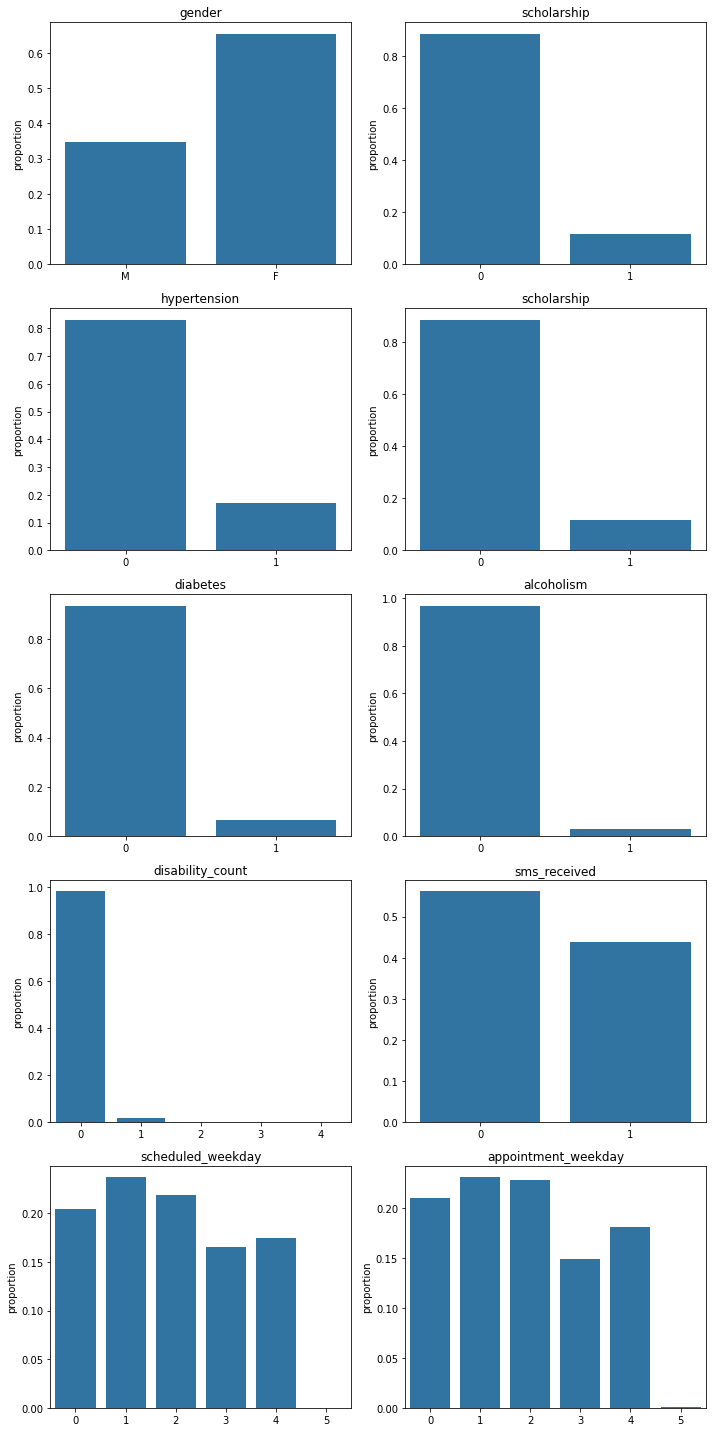

In [155]:
def plot_noshow(df, feature, num_cols):
    """Creates a figure with countplots of the values for each column within a feature."""
    #num_cols = 2  # Number of columns
    num_rows = (len(feature) + num_cols - 1) // num_cols  # Calculate number of rows
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 20))
    axs = axs.flatten()
    for i, column in enumerate(feature):
        sns.countplot(x=df[column], stat='proportion', ax=axs[i])
        axs[i].set_title(column)
        axs[i].set_xlabel('')
    plt.tight_layout()

# Example usage
columns_within_feature = ['gender', 'scholarship', 'hypertension', 'scholarship',
                         'diabetes', 'alcoholism', 'disability_count', 'sms_received',
                         'scheduled_weekday', 'appointment_weekday']  # Example columns within the feature
plot_noshow(df_noshow, columns_within_feature, 2)
plt.show()

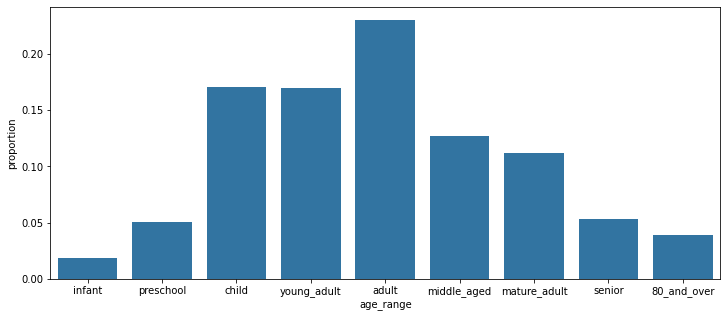

In [156]:
fig = plt.subplots(figsize = fig_dims)
sns.countplot(data=df_noshow, x='age_range', stat='proportion');

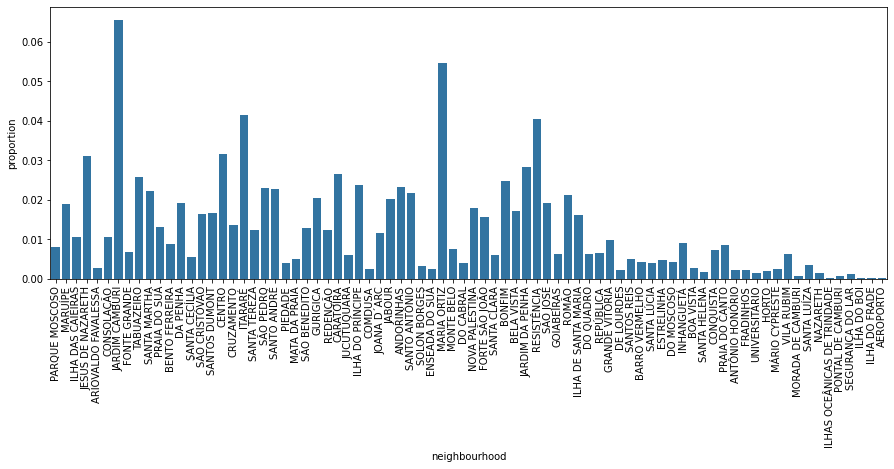

In [157]:
fig = plt.subplots(figsize = (15, 5))
sns.countplot(data=df_noshow, x='neighbourhood', stat='proportion');
plt.xticks(rotation='vertical');

In [158]:
df_engineer.noshow_rate.describe()

count    110516.000000
mean          0.086549
std           0.246985
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: noshow_rate, dtype: float64

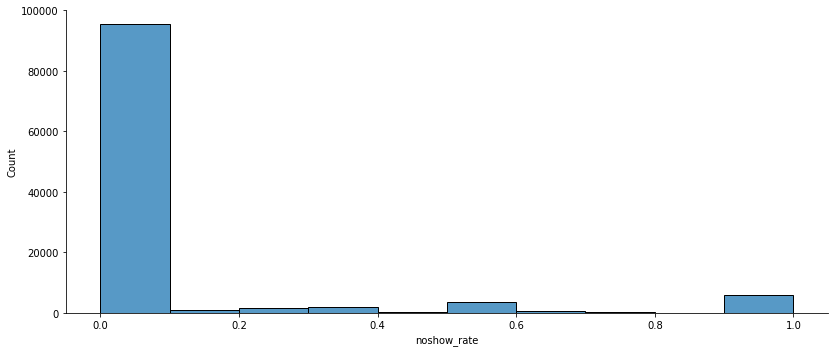

In [159]:
plot_dist(df_engineer, 'noshow_rate', 0.1)

### Feature Selection




In [160]:
from sklearn.feature_selection import chi2

In [161]:
X = df_engineer.drop(['no_show'], axis=1)
y = df_engineer['no_show']
chi_scores = chi2(X, y)
features_chi = pd.DataFrame({'feature': list(X.columns),
                            'chi_score': chi_scores[0],
                            'p_score': chi_scores[1]})
features_chi.head()

,feature,chi_score,p_score
0,scholarship,84.867802,3.189958e-20
1,hypertension,112.633850,2.595387e-26
2,diabetes,23.530309,1.229614e-06
3,alcoholism,0.003207,9.548376e-01
4,disability_count,5.639634,1.755887e-02


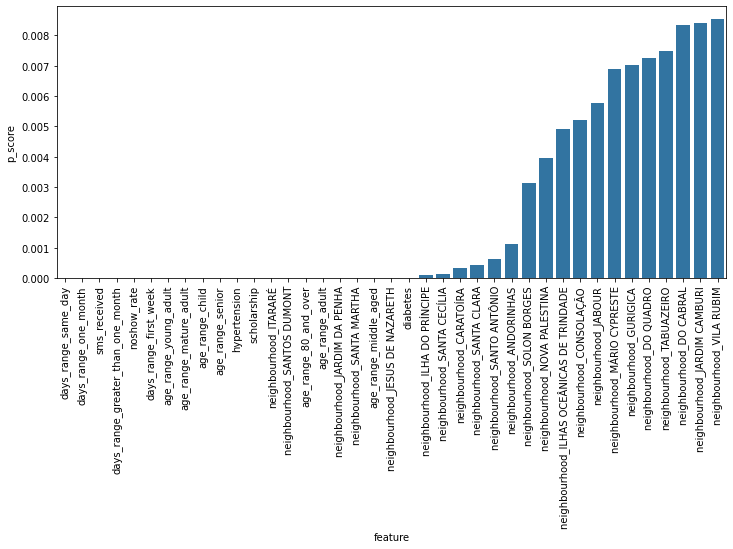

In [162]:
low_p_values = features_chi.query('p_score <= 0.01').sort_values(by='p_score')
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x=low_p_values['feature'], y=low_p_values['p_score']);
plt.xticks(rotation='vertical');

In [163]:
low_p_values.shape[0]

39

In [164]:
X.head()

,scholarship,hypertension,diabetes,alcoholism,disability_count,sms_received,noshow_rate,appointment_weekday,scheduled_weekday,gender_F,...,age_range_young_adult,age_range_adult,age_range_middle_aged,age_range_mature_adult,age_range_senior,age_range_80_and_over,days_range_same_day,days_range_first_week,days_range_one_month,days_range_greater_than_one_month
100517,0,0,0,0,0,0,0.0,4,1,1,...,0,1,0,0,0,0,0,1,0,0
105430,0,0,1,0,0,0,0.0,2,2,0,...,0,1,0,0,0,0,1,0,0,0
3950,0,0,0,0,0,0,0.0,2,2,1,...,0,1,0,0,0,0,1,0,0,0
73303,0,0,0,0,0,0,0.0,0,4,0,...,0,0,0,0,0,0,0,1,0,0
73228,0,0,0,0,0,1,0.0,4,4,1,...,0,0,0,0,0,0,0,1,0,0


In [165]:
high_p_values = features_chi.query('p_score > 0.01')
features_to_drop = list(high_p_values['feature'])
features_to_drop


['alcoholism',
 'disability_count',
 'appointment_weekday',
 'scheduled_weekday',
 'gender_F',
 'gender_M',
 'neighbourhood_AEROPORTO',
 'neighbourhood_ANTÔNIO HONÓRIO',
 'neighbourhood_ARIOVALDO FAVALESSA',
 'neighbourhood_BARRO VERMELHO',
 'neighbourhood_BELA VISTA',
 'neighbourhood_BENTO FERREIRA',
 'neighbourhood_BOA VISTA',
 'neighbourhood_BONFIM',
 'neighbourhood_CENTRO',
 'neighbourhood_COMDUSA',
 'neighbourhood_CONQUISTA',
 'neighbourhood_CRUZAMENTO',
 'neighbourhood_DA PENHA',
 'neighbourhood_DE LOURDES',
 'neighbourhood_DO MOSCOSO',
 'neighbourhood_ENSEADA DO SUÁ',
 'neighbourhood_ESTRELINHA',
 'neighbourhood_FONTE GRANDE',
 'neighbourhood_FORTE SÃO JOÃO',
 'neighbourhood_FRADINHOS',
 'neighbourhood_GOIABEIRAS',
 'neighbourhood_GRANDE VITÓRIA',
 'neighbourhood_HORTO',
 'neighbourhood_ILHA DAS CAIEIRAS',
 'neighbourhood_ILHA DE SANTA MARIA',
 'neighbourhood_ILHA DO BOI',
 'neighbourhood_ILHA DO FRADE',
 'neighbourhood_INHANGUETÁ',
 'neighbourhood_JOANA D´ARC',
 'neighbourhood_

In [166]:
X.drop(columns=features_to_drop, inplace=True)
X.head()

,scholarship,hypertension,diabetes,sms_received,noshow_rate,neighbourhood_ANDORINHAS,neighbourhood_CARATOÍRA,neighbourhood_CONSOLAÇÃO,neighbourhood_DO CABRAL,neighbourhood_DO QUADRO,...,age_range_young_adult,age_range_adult,age_range_middle_aged,age_range_mature_adult,age_range_senior,age_range_80_and_over,days_range_same_day,days_range_first_week,days_range_one_month,days_range_greater_than_one_month
100517,0,0,0,0,0.0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
105430,0,0,1,0,0.0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3950,0,0,0,0,0.0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
73303,0,0,0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
73228,0,0,0,1,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [167]:
selected_df = df_engineer.copy()
selected_df.drop(columns=features_to_drop, inplace=True)
selected_df.head()

,scholarship,hypertension,diabetes,sms_received,no_show,noshow_rate,neighbourhood_ANDORINHAS,neighbourhood_CARATOÍRA,neighbourhood_CONSOLAÇÃO,neighbourhood_DO CABRAL,...,age_range_young_adult,age_range_adult,age_range_middle_aged,age_range_mature_adult,age_range_senior,age_range_80_and_over,days_range_same_day,days_range_first_week,days_range_one_month,days_range_greater_than_one_month
100517,0,0,0,0,0,0.0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
105430,0,0,1,0,0,0.0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3950,0,0,0,0,0,0.0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
73303,0,0,0,0,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
73228,0,0,0,1,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [168]:
from scipy.stats import pearsonr

correlation_results = []

# Compute Pearson correlation coefficients and p-values for each feature
for col in X.columns:
    correlation, p_value = pearsonr(X[col], y)
    correlation_results.append((col, correlation, p_value))

In [169]:
# convert results to a DataFrame
correlation_df = pd.DataFrame(correlation_results, columns=['feature', 'r', 'p'])
correlation_df.head()

,feature,r,p
0,scholarship,0.029182,2.917332e-22
1,hypertension,-0.035631,2.179603e-32
2,diabetes,-0.015146,4.769708e-07
3,sms_received,0.126552,0.000000e+00
4,noshow_rate,0.111385,5.483241e-302


In [170]:
# Filter to see features that have a p value over 0.05
correlation_df[correlation_df['p'] > 0.01]

,feature,r,p


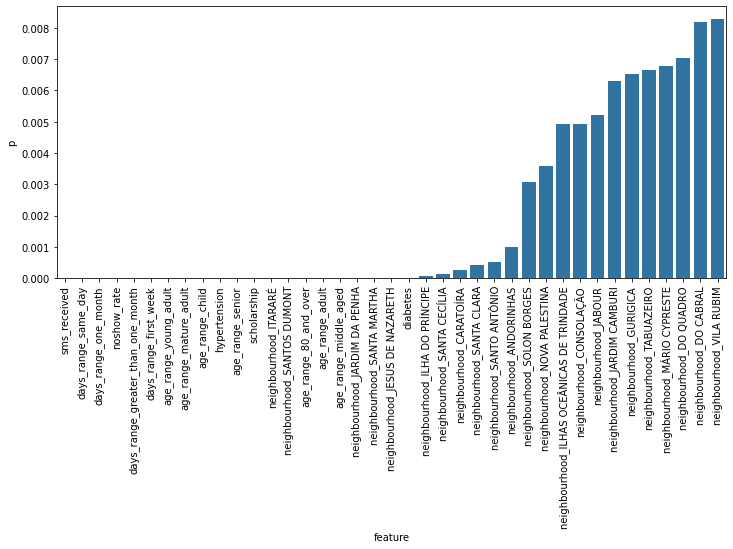

In [171]:
correlation_df.sort_values(by='p', ascending=True, inplace=True)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x=correlation_df['feature'], y=correlation_df['p']);
plt.xticks(rotation='vertical');

In [172]:
X.head()

,scholarship,hypertension,diabetes,sms_received,noshow_rate,neighbourhood_ANDORINHAS,neighbourhood_CARATOÍRA,neighbourhood_CONSOLAÇÃO,neighbourhood_DO CABRAL,neighbourhood_DO QUADRO,...,age_range_young_adult,age_range_adult,age_range_middle_aged,age_range_mature_adult,age_range_senior,age_range_80_and_over,days_range_same_day,days_range_first_week,days_range_one_month,days_range_greater_than_one_month
100517,0,0,0,0,0.0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
105430,0,0,1,0,0.0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3950,0,0,0,0,0.0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
73303,0,0,0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
73228,0,0,0,1,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [173]:
#!pip install imblearn

In [174]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import fbeta_score, accuracy_score
from sklearn.metrics import classification_report 
from imblearn.under_sampling import InstanceHardnessThreshold
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer
from sklearn.neighbors import KNeighborsClassifier


## Training and Prediction

In [175]:
# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 42)

# Show the results of the split
print("Transformed Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Transformed Training set has 88412 samples.
Testing set has 22104 samples.


In [195]:
# Calculate the naive predictor
TP = np.sum(y) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data 
#encoded to numerical values done in the data preprocessing step.
FP = y.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case

# TODO: Calculate accuracy, precision and recall
accuracy = TP/y.count()
recall = TP/(TP + FN)
precision = TP/y.count()

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
fscore = (1 + 4) * ((precision * recall) / ((4 * precision) + recall))

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.2019, F-score: 0.5584]


In [177]:
# initiate models
naive_bayes = MultinomialNB()
rf_mod = RandomForestClassifier(random_state=42)
tree_mod = DecisionTreeClassifier(random_state=42)
kneigh_mod = KNeighborsClassifier()

In [178]:
# train models
naive_bayes.fit(X_train, y_train)
rf_mod.fit(X_train, y_train)
tree_mod.fit(X_train, y_train)
kneigh_mod.fit(X_train, y_train)

KNeighborsClassifier()

In [179]:
# predict results
nb_preds = naive_bayes.predict(X_test)
rf_preds = rf_mod.predict(X_test)
tree_preds = tree_mod.predict(X_test)
k_preds = kneigh_mod.predict(X_test)

In [189]:
# Naive Bayes Classification
print(classification_report(y_test, nb_preds))
print(confusion_matrix(y_test, nb_preds))
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, nb_preds)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, nb_preds, beta = 2)))

              precision    recall  f1-score   support

           0       0.80      0.99      0.89     17666
           1       0.48      0.04      0.07      4438

    accuracy                           0.80     22104
   macro avg       0.64      0.51      0.48     22104
weighted avg       0.74      0.80      0.72     22104

[[17482   184]
 [ 4268   170]]
Accuracy score on testing data: 0.7986
F-score on testing data: 0.0469


In [190]:
# Random Forest
print(classification_report(y_test, rf_preds))
print(confusion_matrix(y_test, rf_preds))
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, rf_preds)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, rf_preds, beta = 2)))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88     17666
           1       0.42      0.11      0.17      4438

    accuracy                           0.79     22104
   macro avg       0.62      0.54      0.53     22104
weighted avg       0.73      0.79      0.74     22104

[[17017   649]
 [ 3959   479]]
Accuracy score on testing data: 0.7915
F-score on testing data: 0.1269


In [191]:
# Decision Tree Classifier
print(classification_report(y_test, tree_preds))
print(confusion_matrix(y_test, tree_preds))
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, tree_preds)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, tree_preds, beta = 2)))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88     17666
           1       0.42      0.10      0.16      4438

    accuracy                           0.79     22104
   macro avg       0.61      0.53      0.52     22104
weighted avg       0.73      0.79      0.74     22104

[[17066   600]
 [ 4006   432]]
Accuracy score on testing data: 0.7916
F-score on testing data: 0.1150


In [192]:
# K-Neighbors Classifier
print(classification_report(y_test, k_preds))
print(confusion_matrix(y_test, k_preds))
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, k_preds)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, k_preds, beta = 2)))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86     17666
           1       0.34      0.21      0.26      4438

    accuracy                           0.76     22104
   macro avg       0.58      0.55      0.56     22104
weighted avg       0.72      0.76      0.74     22104

[[15925  1741]
 [ 3523   915]]
Accuracy score on testing data: 0.7619
F-score on testing data: 0.2242


### Model Selection
Random Forest has the best overall scores across the board. I will determine if any additional improvements can be made through tuning the model.

In [184]:
# Try tuning K-Neighbors using cross validation
forest = RandomForestClassifier(random_state=42)

# Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=2)

parameters = {"max_depth": [3, None],
              "n_estimators": list(range(10, 200)),
              "max_features": list(range(1, X_test.shape[1]+1)),
              "min_samples_split": list(range(2, 11)),
              "min_samples_leaf": list(range(1, 11)),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
random_obj = RandomizedSearchCV(forest, parameters, scoring=scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
forest_fit = random_obj.fit(X_train, y_train)

# Get the estimator
best_forest = forest_fit.best_estimator_

In [185]:
forest_fit.best_params_

{'n_estimators': 177,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_features': 21,
 'max_depth': None,
 'criterion': 'entropy',
 'bootstrap': True}

In [186]:
# Random Forest results using the best Randomized Search Parameters
forest_preds = best_forest.predict(X_test)
print(classification_report(y_test, forest_preds))
print(confusion_matrix(y_test, forest_preds))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88     17666
           1       0.42      0.11      0.17      4438

    accuracy                           0.79     22104
   macro avg       0.62      0.53      0.53     22104
weighted avg       0.73      0.79      0.74     22104

[[17011   655]
 [ 3963   475]]


In [188]:
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, rf_preds)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, rf_preds, beta = 2)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, forest_preds)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, forest_preds, beta = 2)))

Unoptimized model
------
Accuracy score on testing data: 0.7915
F-score on testing data: 0.1269

Optimized Model
------
Final accuracy score on the testing data: 0.7911
Final F-score on the testing data: 0.1258


In [ ]:
# Retrieve feature importances
importances = best_forest.feature_importances_

# Sort features based on importance scores
sorted_indices = importances.argsort()[::-1]  # Sort in descending order

# Print feature importances
for idx in sorted_indices:
    print(f"Feature: {X_train.columns[idx]}, Importance: {importances[idx]}")

In [ ]:
# create a DataFrame of features and their importances
important_features = pd.DataFrame({'feature': X_train.columns[sorted_indices],
                                   'importance': importances[sorted_indices]})

In [ ]:
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x=important_features['feature'], y=important_features['importance']);
plt.xticks(rotation='vertical');

In [193]:
# Try tuning K-Neighbors using cross validation
kn_random = KNeighborsClassifier()

# Make an f1_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=2)

parameters = {'weights': ['uniform', 'distance'],
              'algorithm': ['ball_tree', 'kd_tree', 'brute'],
              'leaf_size': [10, 50, 100, 500, 1000],
              }

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
random_obj = RandomizedSearchCV(kn_random, parameters, scoring=scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
random_fit = random_obj.fit(X_train, y_train)

# Get the estimator
best_kn = random_fit.best_estimator_

In [194]:
kn_preds = random_fit.best_estimator_.predict(X_test)
print(classification_report(y_test, kn_preds))
print(confusion_matrix(y_test, kn_preds))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86     17666
           1       0.34      0.21      0.26      4438

    accuracy                           0.76     22104
   macro avg       0.58      0.55      0.56     22104
weighted avg       0.72      0.76      0.74     22104

[[15878  1788]
 [ 3513   925]]


In [196]:
from sklearn.metrics import RocCurveDisplay

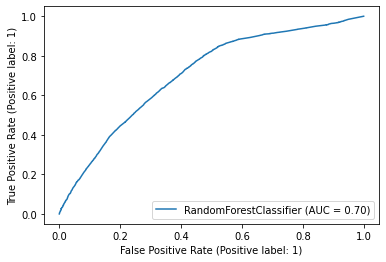

In [198]:
RocCurveDisplay.from_estimator(best_forest, X_test, y_test);


In [201]:
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, forest_preds)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, forest_preds, beta = 2)))

Accuracy score on testing data: 0.7911
F-score on testing data: 0.1258


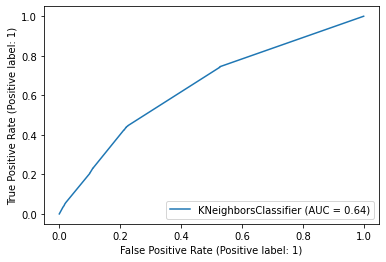

In [199]:
RocCurveDisplay.from_estimator(best_kn, X_test, y_test);


In [200]:
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, kn_preds)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, kn_preds, beta = 2)))

Accuracy score on testing data: 0.7602
F-score on testing data: 0.2260


In [ ]:
from sklearn.metrics import roc_auc_score
score = roc_auc_score(y_real, y_pred)
print(f"ROC AUC: {score:.4f}")

<a id='conclusions'></a>
## Conclusions

#### Factors Associated with No Shows

As can be seen in these charts, when the proportions of no shows for different patient characteristics are compared, there are some interesting results. These charts indicate the proportion of patients who have no-showed based on each of the different characteristics available in the dataset, with the exception of neighborhood.

In [ ]:
finalcharts()

In [ ]:
finalagechart()

The proportion of no shows is roughly even for gender and alcoholism status, making it appear that there is little relationship between these characteristics and not attending the appointments.

Having a scholarship or receiving a text message appears to be positively related with not showing up for an appointment.

Having Diabetes or Hypertension have a negative relationship with no shows. Having 1 disability also has a negative relationship with no shows, but it appears that the more disabilities the patient has, the more likely they were to have no showed for their appointment.

Age has a positive skew, indicating that younger patients tend to no show more frequently.

##### Limitations

An important limitation when viewing these charts is that these are all univariate analyses. In reality, the appointments actually represent patients with multiple characteristics that would interact. For example, a patient with diabetes, hypertension and alcoholism may look very different from a patient with just diabetes and hypertension. In addition, these are correlational rather than causal relationships. Performing analyses between how all of these factors interact, particularly in situations where patients may have multiple characteristics, would be interesting future research.

#### SMS Messages and No Shows

The SMS Received relationship with no shows is really interesting. We would definitely expect patients who receive text message reminders to be more likely to attend their appointments. However, since the chart above only explores the relationship between no shows and receipt of a text message, it does not take into consideration other factors that could very much impact the relationships. One thing to be aware of from reviewing the data related to the number of days between scheduling the appointment and the appointment, itself, is that SMS messages were not sent for patients who scheduled their appointment on the same day as the appointment. Since appointments scheduled on the same day of the appointment accounted for a large number of the appointments, it is helpful to dig deeper to see if receiving a text message reminder is actually more likely to be associated with having missed the appointment.

In [ ]:
finalSMSChart()

As can be seen here, receiving a SMS Reminder appears to have a more positive relationship with no shows than not receiving one.

##### Limitations

As with above, this is a shallow view of the data that does not take all of the interactions between the different patient characteristics into consideration. It is possible that SMS Reminders might show more of a positive relationship for a certain subset of the population who would otherwise be unlikely to attend. It is also possible that they may have no correlation at all for another subset. Critically, we cannot draw any causal relationships between receiving a text message reminder and appointment attendance based on these analyses. In order to draw more valid conclusions, additional research and analysis that compares the different patient characteristics would also be helpful.

<a id='sources'></a>
## Sources

To understand the Scholarship column, which indicates enrollment in Bolsa Familia 
[Wikipedia Article](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia) 
[World Without Poverty Bolsa Familia Webpage](http://wwp.org.br/en/social-policy/bolsa-familia/) 
[World Without Poverty Bolsa Familia Program Sheet](inthttps://wwp.org.br/wp-content/uploads/02.-BFP-Program-Sheet.pdf)

For additional details about the data set, including the data dictionary:
https://www.kaggle.com/datasets/joniarroba/noshowappointments

For Markdown:
https://wordpress.com/support/markdown-quick-reference/
https://www.markdownguide.org/extended-syntax/
https://www.tablesgenerator.com/markdown_tables#
https://stackoverflow.com/questions/51573722/nested-numbered-list-do-not-break-line-in-jupyter-notebook-markdown

For plotting:
Pie Charts: https://matplotlib.org/2.0.2/examples/pie_and_polar_charts/pie_demo_features.html
Line Chart: https://www.statology.org/plot-multiple-lines-matplotlib/

For figures:
https://www.tutorialspoint.com/setting-the-same-axis-limits-for-all-subplots-in-matplotlib
https://matplotlib.org/stable/users/explain/figures.html#figure-explanation
https://matplotlib.org/stable/gallery/ticks/tick-locators.html

## OPTIONAL: Question for the reviewer
 
If you have any question about the starter code or your own implementation, please add it in the cell below. 

For example, if you want to know why a piece of code is written the way it is, or its function, or alternative ways of implementing the same functionality, or if you want to get feedback on a specific part of your code or get feedback on things you tried but did not work.

Please keep your questions succinct and clear to help the reviewer answer them satisfactorily. 

> **_Your question_**

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])